Coefficients_China: [-5.01452830e+05  1.25911865e+02]
Intercept_China: 499265008.5909834
MSE_China: nan
Coefficients_India: [-1.85163709e+06  4.60188370e+02]
Intercept_India: 1862595529.4457998
MSE: nan
Coefficients_EU: [-1.85163709e+06  4.60188370e+02]
Intercept_EU: 1862595529.4457998
MSE: nan
Coefficients_North_America: [ 7.51328209e+04 -1.85851695e+01]
Intercept_North_America: -75915942.87247705
MSE: nan
Coefficients_Total: [-1.67148894e+06  4.17277473e+02]
Intercept_Total: 1674061632.419014
MSE: nan
China: Y =  499265008.5909834 + -501452.83 * X +  125.91 * X^2
India: Y =  1862595529.4457998 + -1851637.09 * X +  460.19 * X^2
EU: Y =  73600077.65880299 + -73537.23 * X +  18.38 * X^2
North America: Y =  -75915942.87247705 + 75132.82 * X +  -18.59 * X^2
Total: Y =  1674061632.419014 + -1671488.94 * X +  417.28 * X^2
Y_pred_China: [101067.20686376 108424.22432804 116033.06552267 123893.73044771
 132006.21910316 140370.5314889  148986.66760504 157854.62745148
 166974.41102839 176346.018

/Library/Python/3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Python/3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


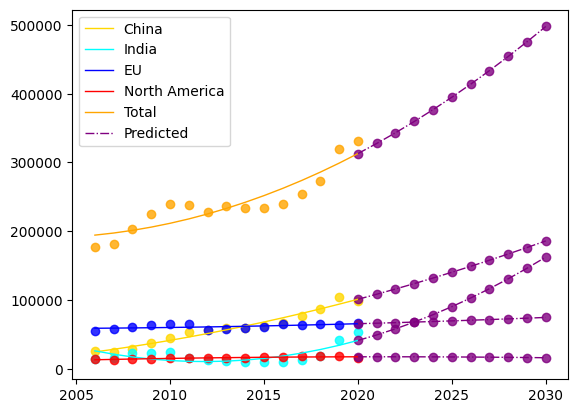

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,r2_score#用于模型作评价使用
from sklearn.linear_model import LinearRegression#线性模型
from sklearn.model_selection import  train_test_split#用于分割训练集和测试集
from sklearn.preprocessing import PolynomialFeatures#多项式特征
import matplotlib.pyplot as plt

#read in the data
data = pd.read_csv('data5.csv')

X = np.asarray(data.get('Academic_Year')).reshape(-1,1)
y_China = np.asarray(data.get('China'))
y_India = np.asarray(data.get('India'))
y_North_America = np.asarray(data.get('North_America'))
y_EU = np.asarray(data.get('EU'))
y_Total = np.asarray(data.get('Total'))


Z = np.column_stack((X, X ** 2))
Z = np.column_stack((Z, np.ones(len(X))))

Z_train = Z[0:15]
Z_test = Z[15:]

y_train_China = y_China[0:15]
y_test_China = y_China[15:]

y_train_India = y_India[0:15]
y_test_India = y_India[15:]

y_train_EU = y_EU[0:15]
y_test_EU = y_EU[15:]

y_train_North_America = y_North_America[0:15]
y_test_North_America = y_North_America[15:]

y_train_Total = y_Total[0:15]
y_test_Total= y_Total[15:]

Z_train = np.mat(Z_train)
y_train_China = np.mat(y_train_China).T
y_train_India = np.mat(y_train_India).T
y_train_EU = np.mat(y_train_EU).T
y_train_North_America = np.mat(y_train_North_America).T
y_train_Total = np.mat(y_train_Total).T

# Regulation
xTx = Z_train.T * Z_train

w_China = 0
w_India = 0
w_North_America = 0
w_EU = 0
w_Total = 0

if np.linalg.det(xTx) == 0.0:
    print('xTX can not inverse')
else:
    w_China= np.ravel(xTx.I * (Z_train.T * y_train_China))
    w_India= np.ravel(xTx.I * (Z_train.T * y_train_India))
    w_EU= np.ravel(xTx.I * (Z_train.T * y_train_EU))
    w_North_America= np.ravel(xTx.I * (Z_train.T * y_train_North_America))
    w_Total= np.ravel(xTx.I * (Z_train.T * y_train_Total))

coef_China = w_China[:-1]
intercept_China = w_China[-1]

coef_India = w_India[:-1]
intercept_India = w_India[-1]

coef_EU = w_EU[:-1]
intercept_EU = w_EU[-1]


coef_North_America = w_North_America[:-1]
intercept_North_America = w_North_America[-1]

coef_Total = w_Total[:-1]
intercept_Total = w_Total[-1]

Z_train = Z_train[:, 0:2]
Z_test = Z_test[:, 0:2]
y_test_pred_China = coef_China[0] * Z_test[:, 0] + coef_China[1] * Z_test[:, 1] + intercept_China
y_test_pred_India = coef_India[0] * Z_test[:, 0] + coef_India[1] * Z_test[:, 1] + intercept_India
y_test_pred_EU = coef_EU[0] * Z_test[:, 0] + coef_EU[1] * Z_test[:, 1] + intercept_EU
y_test_pred_North_America = coef_North_America[0] * Z_test[:, 0] + coef_North_America[1] * Z_test[:, 1] + intercept_North_America
y_test_pred_Total = coef_Total[0] * Z_test[:, 0] + coef_Total[1] * Z_test[:, 1] + intercept_Total

Z_train = np.ravel(Z_train)
y_train_China = np.ravel(y_train_China)
y_train_India = np.ravel(y_train_India)
y_train_EU = np.ravel(y_train_EU)
y_train_North_America = np.ravel(y_train_North_America)
y_train_Total = np.ravel(y_train_Total)

print('Coefficients_China:', coef_China)
print('Intercept_China:', intercept_China)
print("MSE_China: %.2f" %np.average((y_test_China - y_test_pred_China) ** 2))

print('Coefficients_India:', coef_India)
print('Intercept_India:', intercept_India)
print("MSE: %.2f" %np.average((y_test_India - y_test_pred_India) ** 2))

print('Coefficients_EU:', coef_India)
print('Intercept_EU:', intercept_India)
print("MSE: %.2f" %np.average((y_test_EU - y_test_pred_EU) ** 2))

print('Coefficients_North_America:', coef_North_America)
print('Intercept_North_America:', intercept_North_America)
print("MSE: %.2f" %np.average((y_test_North_America - y_test_pred_North_America) ** 2))

print('Coefficients_Total:', coef_Total)
print('Intercept_Total:', intercept_Total)
print("MSE: %.2f" %np.average((y_test_Total - y_test_pred_Total) ** 2))

X_train = X[0:15]

print("China: Y = ",intercept_China,"+",np.round(coef_China[0],2),"* X + ",np.round(coef_China[1],2),"* X^2")
print("India: Y = ",intercept_India,"+",np.round(coef_India[0],2),"* X + ",np.round(coef_India[1],2),"* X^2")
print("EU: Y = ",intercept_EU,"+",np.round(coef_EU[0],2),"* X + ",np.round(coef_EU[1],2),"* X^2")
print("North America: Y = ",intercept_North_America,"+",np.round(coef_North_America[0],2),"* X + ",np.round(coef_North_America[1],2),"* X^2")
print("Total: Y = ",intercept_Total,"+",np.round(coef_Total[0],2),"* X + ",np.round(coef_Total[1],2),"* X^2")

plt.scatter(X_train, y_train_China, alpha = 0.8, color = 'gold')
plt.plot(X_train, intercept_China + coef_China[0] * X_train + coef_China[1] * X_train * X_train, color = 'gold', linewidth = 1, label = 'China')

plt.scatter(X_train, y_train_India, alpha = 0.8, color = 'cyan')
plt.plot(X_train, intercept_India + coef_India[0] * X_train + coef_India[1] * X_train * X_train, color = 'cyan', linewidth = 1,label = 'India')

plt.scatter(X_train, y_train_EU, alpha = 0.8, color = 'blue')
plt.plot(X_train, intercept_EU + coef_EU[0] * X_train + coef_EU[1] * X_train * X_train, color = 'blue', linewidth = 1,label = 'EU')

plt.scatter(X_train, y_train_North_America, alpha = 0.8, color = 'red')
plt.plot(X_train, intercept_North_America + coef_North_America[0] * X_train + coef_North_America[1] * X_train * X_train, color = 'red', linewidth = 1,label = 'North America')

plt.scatter(X_train, y_train_Total, alpha = 0.8, color = 'orange')
plt.plot(X_train, intercept_Total + coef_Total[0] * X_train + coef_Total[1] * X_train * X_train, color = 'orange', linewidth = 1,label = 'Total')


X_pred = np.array([2020, 2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
Y_pred_China = intercept_China + X_pred * coef_China[0] + coef_China[1] * X_pred * X_pred
Y_pred_India = intercept_India + X_pred * coef_India[0] + coef_India[1] * X_pred * X_pred
Y_pred_EU = intercept_EU + X_pred * coef_EU[0] + coef_EU[1] * X_pred * X_pred
Y_pred_North_America = intercept_North_America + X_pred * coef_North_America[0] + coef_North_America[1] * X_pred * X_pred
Y_pred_Total = intercept_Total + X_pred * coef_Total[0] + coef_Total[1] * X_pred * X_pred

plt.plot(X_pred, intercept_China + coef_China[0] * X_pred + coef_China[1] * X_pred * X_pred, color = 'purple', linewidth = 1,linestyle = '-.',label = 'Predicted')
plt.scatter(X_pred, Y_pred_China, alpha = 0.8, color = 'purple')

plt.plot(X_pred, intercept_India + coef_India[0] * X_pred + coef_India[1] * X_pred * X_pred, color = 'purple', linewidth = 1, linestyle = '-.')
plt.scatter(X_pred, Y_pred_India, alpha = 0.8, color = 'purple')

plt.plot(X_pred, intercept_EU + coef_EU[0] * X_pred + coef_EU[1] * X_pred * X_pred, color = 'purple', linewidth = 1, linestyle = '-.')
plt.scatter(X_pred, Y_pred_EU, alpha = 0.8, color = 'purple')

plt.plot(X_pred, intercept_North_America + coef_North_America[0] * X_pred + coef_North_America[1] * X_pred * X_pred, color = 'purple', linewidth = 1, linestyle = '-.')
plt.scatter(X_pred, Y_pred_North_America, alpha = 0.8, color = 'purple')

plt.plot(X_pred, intercept_Total + coef_Total[0] * X_pred + coef_Total[1] * X_pred * X_pred, color = 'purple', linewidth = 1,linestyle = '-.')
plt.scatter(X_pred, Y_pred_Total, alpha = 0.8, color = 'purple')

print('Y_pred_China:', Y_pred_China)
print('Y_pred_India:', Y_pred_India)
print('Y_pred_North_America:', Y_pred_North_America)
print('Y_pred_EU:', Y_pred_EU)
print('Y_pred_Total:', Y_pred_Total)

plt.legend(loc=2)
plt.show()